# Data Cleaning & Preprocessing

This notebook performs data cleaning on the Lightcast job postings dataset, preparing it for exploratory analysis and machine learning models.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

df = pd.read_csv('data/lightcast_job_postings.csv', low_memory=False)
print(f"Original dataset shape: {df.shape}")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
display(df.head())

Original dataset shape: (72498, 131)


,ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,ACTIVE_URLS,ACTIVE_SOURCES_INFO,TITLE_RAW,BODY,MODELED_EXPIRED,MODELED_DURATION,COMPANY,COMPANY_NAME,COMPANY_RAW,COMPANY_IS_STAFFING,EDUCATION_LEVELS,EDUCATION_LEVELS_NAME,MIN_EDULEVELS,MIN_EDULEVELS_NAME,MAX_EDULEVELS,MAX_EDULEVELS_NAME,EMPLOYMENT_TYPE,EMPLOYMENT_TYPE_NAME,MIN_YEARS_EXPERIENCE,MAX_YEARS_EXPERIENCE,IS_INTERNSHIP,SALARY,REMOTE_TYPE,REMOTE_TYPE_NAME,ORIGINAL_PAY_PERIOD,SALARY_TO,SALARY_FROM,LOCATION,CITY,CITY_NAME,COUNTY,COUNTY_NAME,MSA,MSA_NAME,STATE,STATE_NAME,COUNTY_OUTGOING,COUNTY_NAME_OUTGOING,COUNTY_INCOMING,COUNTY_NAME_INCOMING,MSA_OUTGOING,MSA_NAME_OUTGOING,MSA_INCOMING,MSA_NAME_INCOMING,NAICS2,NAICS2_NAME,NAICS3,NAICS3_NAME,NAICS4,NAICS4_NAME,NAICS5,NAICS5_NAME,NAICS6,NAICS6_NAME,TITLE,TITLE_NAME,TITLE_CLEAN,SKILLS,SKILLS_NAME,SPECIALIZED_SKILLS,SPECIALIZED_SKILLS_NAME,CERTIFICATIONS,CERTIFICATIONS_NAME,COMMON_SKILLS,COMMON_SKILLS_NAME,SOFTWARE_SKILLS,SOFTWARE_SKILLS_NAME,ONET,ONET_NAME,ONET_2019,ONET_2019_NAME,CIP6,CIP6_NAME,CIP4,CIP4_NAME,CIP2,CIP2_NAME,SOC_2021_2,SOC_2021_2_NAME,SOC_2021_3,SOC_2021_3_NAME,SOC_2021_4,SOC_2021_4_NAME,SOC_2021_5,SOC_2021_5_NAME,LOT_CAREER_AREA,LOT_CAREER_AREA_NAME,LOT_OCCUPATION,LOT_OCCUPATION_NAME,LOT_SPECIALIZED_OCCUPATION,LOT_SPECIALIZED_OCCUPATION_NAME,LOT_OCCUPATION_GROUP,LOT_OCCUPATION_GROUP_NAME,LOT_V6_SPECIALIZED_OCCUPATION,LOT_V6_SPECIALIZED_OCCUPATION_NAME,LOT_V6_OCCUPATION,LOT_V6_OCCUPATION_NAME,LOT_V6_OCCUPATION_GROUP,LOT_V6_OCCUPATION_GROUP_NAME,LOT_V6_CAREER_AREA,LOT_V6_CAREER_AREA_NAME,SOC_2,SOC_2_NAME,SOC_3,SOC_3_NAME,SOC_4,SOC_4_NAME,SOC_5,SOC_5_NAME,LIGHTCAST_SECTORS,LIGHTCAST_SECTORS_NAME,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
0,1f57d95acf4dc67ed2819eb12f049f6a5c11782c,9/6/2024,2024-09-06 20:32:57.352 Z,0.0,6/2/2024,6/8/2024,6.0,"[\n ""Company""\n]","[\n ""brassring.com""\n]","[\n ""https://sjobs.brassring.com/TGnewUI/Sear...",[],NaN,Enterprise Analyst (II-III),31-May-2024\n\nEnterprise Analyst (II-III)\n\n...,6/8/2024,6.0,894731.0,Murphy USA,Murphy USA,False,[\n 2\n],"[\n ""Bachelor's degree""\n]",2.0,Bachelor's degree,NaN,NaN,1.0,Full-time (> 32 hours),2.0,2.0,False,NaN,0.0,[None],NaN,NaN,NaN,"{\n ""lat"": 33.20763,\n ""lon"": -92.6662674\n}",RWwgRG9yYWRvLCBBUg==,"El Dorado, AR",5139.0,"Union, AR",20980.0,"El Dorado, AR",5.0,Arkansas,5139.0,"Union, AR",5139.0,"Union, AR",20980.0,"El Dorado, AR",20980.0,"El Dorado, AR",44.0,Retail Trade,441.0,Motor Vehicle and Parts Dealers,4413.0,"Automotive Parts, Accessories, and Tire Retailers",44133.0,Automotive Parts and Accessories Retailers,441330.0,Automotive Parts and Accessories Retailers,ET29C073C03D1F86B4,Enterprise Analysts,enterprise analyst ii iii,"[\n ""KS126DB6T061MHD7RTGQ"",\n ""KS126706DPFD3...","[\n ""Merchandising"",\n ""Mathematics"",\n ""Pr...","[\n ""KS126DB6T061MHD7RTGQ"",\n ""KS128006L3V0H...","[\n ""Merchandising"",\n ""Predictive Modeling""...",[],[],"[\n ""KS126706DPFD3354M7YK"",\n ""KS1280B68GD79...","[\n ""Mathematics"",\n ""Presentations"",\n ""Re...","[\n ""KS440W865GC4VRBW6LJP"",\n ""KS13USA80NE38...","[\n ""SQL (Programming Language)"",\n ""Power B...",15-2051.01,Business Intelligence Analysts,15-2051.01,Business Intelligence Analysts,"[\n ""45.0601"",\n ""27.0101""\n]","[\n ""Economics, General"",\n ""Mathematics, Ge...","[\n ""45.06"",\n ""27.01""\n]","[\n ""Economics"",\n ""Mathematics""\n]","[\n ""45"",\n ""27""\n]","[\n ""Social Sciences"",\n ""Mathematics and St...",15-0000,Computer and Mathematical Occupations,15-2000,Mathematical Science Occupations,15-2050,Data Scientists,15-2051,Data Scientists,23.0,Information Technology and Computer Science,231010.0,Business Intelligence Analyst,23101011.0,General ERP Analyst / Consultant,2310.0,Business Intelligence,23101011.0,General ERP Analyst / Consultant,231010.0,Business Intelligence Analyst,2310.0,Business Intel

## Dropping Unnecessary Columns

We remove redundant columns including tracking data, duplicate NAICS/SOC versions, and URL fields that aren't needed for analysis.

In [6]:
columns_to_drop = [
    'ID', 'URL', 'ACTIVE_URLS', 'DUPLICATES', 'LAST_UPDATED_TIMESTAMP',
    'ACTIVE_SOURCES_INFO', 'BODY', 'SOURCES', 'SOURCE_TYPES',
    'NAICS2', 'NAICS3', 'NAICS4', 'NAICS5', 'NAICS6',
    'NAICS2_NAME', 'NAICS3_NAME', 'NAICS4_NAME', 'NAICS5_NAME', 'NAICS6_NAME',
    'SOC_2', 'SOC_3', 'SOC_4', 'SOC_5',
    'SOC_2_NAME', 'SOC_3_NAME', 'SOC_4_NAME', 'SOC_5_NAME',
    'COUNTY_OUTGOING', 'COUNTY_NAME_OUTGOING', 'COUNTY_INCOMING', 'COUNTY_NAME_INCOMING',
    'MSA_OUTGOING', 'MSA_NAME_OUTGOING', 'MSA_INCOMING', 'MSA_NAME_INCOMING',
    'LAST_UPDATED_DATE',
    'MODELED_EXPIRED', 'MODELED_DURATION',
    'COMPANY', 'COMPANY_RAW',
    'TITLE', 'TITLE_RAW',
    'LOCATION',
    'SKILLS', 'SPECIALIZED_SKILLS', 'COMMON_SKILLS', 'SOFTWARE_SKILLS',
    'CERTIFICATIONS',
    'ONET_2019', 'ONET_2019_NAME',
    'CIP6', 'CIP4', 'CIP2', 'CIP6_NAME', 'CIP4_NAME', 'CIP2_NAME'
]

# Drop only columns that exist
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)
print(f"Shape after dropping columns: {df.shape}")

Shape after dropping columns: (72498, 75)


## Missing Values Analysis

Visualizing and handling missing values in the dataset.

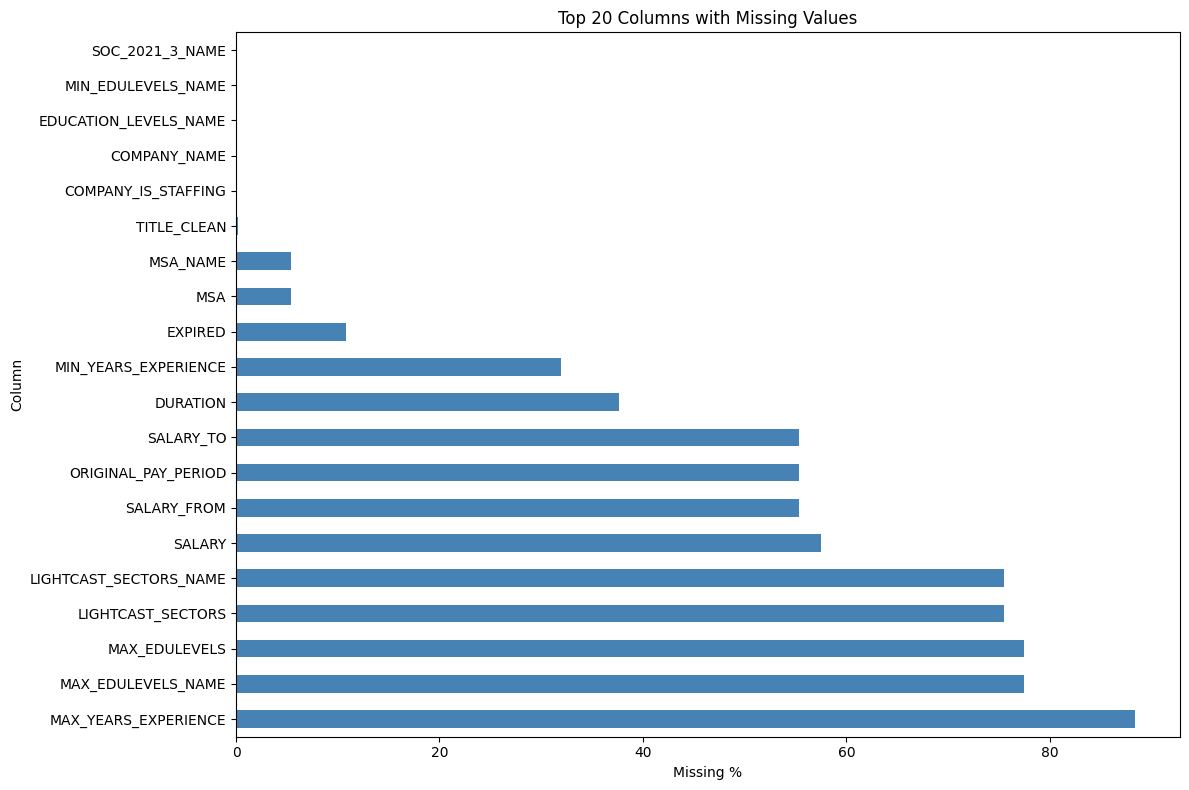

In [8]:
# Missing values bar chart (cleaner)
plt.figure(figsize=(12, 8))
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]  # Only show columns with missing values

if len(missing_pct) > 0:
    missing_pct.head(20).plot(kind='barh', color='steelblue')
    plt.xlabel('Missing %')
    plt.ylabel('Column')
    plt.title('Top 20 Columns with Missing Values')
    plt.tight_layout()
    plt.savefig('figures/missing_values_bar.png', dpi=150)
    plt.show()
else:
    print("No missing values found!")

In [9]:
# Check missing value percentages
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print("Columns with >50% missing values:")
print(missing_pct[missing_pct > 50])

Columns with >50% missing values:
MAX_YEARS_EXPERIENCE      88.372093
MAX_EDULEVELS_NAME        77.495931
MAX_EDULEVELS             77.495931
LIGHTCAST_SECTORS         75.465530
LIGHTCAST_SECTORS_NAME    75.465530
SALARY                    57.505035
SALARY_FROM               55.311871
ORIGINAL_PAY_PERIOD       55.311871
SALARY_TO                 55.311871
dtype: float64


In [10]:
# Drop columns with >50% missing values
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)
print(f"Shape after dropping high-missing columns: {df.shape}")

Shape after dropping high-missing columns: (72498, 66)


## Handling Missing Values

- Salary: Fill with median
- Categorical fields: Fill with "Unknown"

In [12]:
# Fill salary with median
if 'SALARY' in df.columns:
    df['SALARY'].fillna(df['SALARY'].median(), inplace=True)

# Fill categorical columns with 'Unknown'
categorical_cols = ['REMOTE_TYPE_NAME', 'STATE_NAME', 'CITY_NAME', 'EMPLOYMENT_TYPE_NAME']
for col in categorical_cols:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)

/tmp/ipykernel_6921/573068074.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


## Removing Duplicates

Removing duplicate job postings based on title, company, and location.

In [13]:
# Remove duplicates
before = len(df)
df.drop_duplicates(subset=['TITLE_NAME', 'COMPANY_NAME', 'CITY_NAME', 'POSTED'], keep='first', inplace=True)
after = len(df)
print(f"Removed {before - after} duplicate rows")
print(f"Final dataset shape: {df.shape}")

Removed 2343 duplicate rows
Final dataset shape: (70155, 66)


## Filter for Data Science & Analytics Roles

Since our focus is on Business Analytics, Data Science, and Machine Learning trends, we filter for relevant job titles.

In [14]:
# Keywords for our topic
keywords = ['data', 'analytics', 'analyst', 'science', 'scientist', 'machine learning', 
            'ml engineer', 'business intelligence', 'bi ', 'statistician', 'ai ']

# Filter rows where title contains any keyword (case insensitive)
pattern = '|'.join(keywords)
df_filtered = df[df['TITLE_NAME'].str.lower().str.contains(pattern, na=False)].copy()
print(f"Filtered dataset shape (Data/Analytics roles): {df_filtered.shape}")

Filtered dataset shape (Data/Analytics roles): (37102, 66)


In [15]:
# Save cleaned datasets
df.to_csv('data/lightcast_cleaned.csv', index=False)
df_filtered.to_csv('data/lightcast_data_roles.csv', index=False)


In [16]:
df_filtered.head()

,POSTED,EXPIRED,DURATION,COMPANY_NAME,COMPANY_IS_STAFFING,EDUCATION_LEVELS,EDUCATION_LEVELS_NAME,MIN_EDULEVELS,MIN_EDULEVELS_NAME,EMPLOYMENT_TYPE,EMPLOYMENT_TYPE_NAME,MIN_YEARS_EXPERIENCE,IS_INTERNSHIP,REMOTE_TYPE,REMOTE_TYPE_NAME,CITY,CITY_NAME,COUNTY,COUNTY_NAME,MSA,MSA_NAME,STATE,STATE_NAME,TITLE_NAME,TITLE_CLEAN,SKILLS_NAME,SPECIALIZED_SKILLS_NAME,CERTIFICATIONS_NAME,COMMON_SKILLS_NAME,SOFTWARE_SKILLS_NAME,ONET,ONET_NAME,SOC_2021_2,SOC_2021_2_NAME,SOC_2021_3,SOC_2021_3_NAME,SOC_2021_4,SOC_2021_4_NAME,SOC_2021_5,SOC_2021_5_NAME,LOT_CAREER_AREA,LOT_CAREER_AREA_NAME,LOT_OCCUPATION,LOT_OCCUPATION_NAME,LOT_SPECIALIZED_OCCUPATION,LOT_SPECIALIZED_OCCUPATION_NAME,LOT_OCCUPATION_GROUP,LOT_OCCUPATION_GROUP_NAME,LOT_V6_SPECIALIZED_OCCUPATION,LOT_V6_SPECIALIZED_OCCUPATION_NAME,LOT_V6_OCCUPATION,LOT_V6_OCCUPATION_NAME,LOT_V6_OCCUPATION_GROUP,LOT_V6_OCCUPATION_GROUP_NAME,LOT_V6_CAREER_AREA,LOT_V6_CAREER_AREA_NAME,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
0,6/2/2024,6/8/2024,6.0,Murphy USA,False,[\n 2\n],"[\n ""Bachelor's degree""\n]",2.0,Bachelor's degree,1.0,Full-time (> 32 hours),2.0,False,0.0,[None],RWwgRG9yYWRvLCBBUg==,"El Dorado, AR",5139.0,"Union, AR",20980.0,"El Dorado, AR",5.0,Arkansas,Enterprise Analysts,enterprise analyst ii iii,"[\n ""Merchandising"",\n ""Mathematics"",\n ""Pr...","[\n ""Merchandising"",\n ""Predictive Modeling""...",[],"[\n ""Mathematics"",\n ""Presentations"",\n ""Re...","[\n ""SQL (Programming Language)"",\n ""Power B...",15-2051.01,Business Intelligence Analysts,15-0000,Computer and Mathematical Occupations,15-2000,Mathematical Science Occupations,15-2050,Data Scientists,15-2051,Data Scientists,23.0,Information Technology and Computer Science,231010.0,Business Intelligence Analyst,23101011.0,General ERP Analyst / Consultant,2310.0,Business Intelligence,23101011.0,General ERP Analyst / Consultant,231010.0,Business Intelligence Analyst,2310.0,Business Intelligence,23.0,Information Technology and Computer Science,44.0,Retail Trade,441.0,Motor Vehicle and Parts Dealers,4413.0,"Automotive Parts, Accessories, and Tire Retailers",44133.0,Automotive Parts and Accessories Retailers,441330.0,Automotive Parts and Accessories Retailers
2,6/2/2024,7/7/2024,35.0,Sedgwick,False,[\n 2\n],"[\n ""Bachelor's degree""\n]",2.0,Bachelor's degree,1.0,Full-time (> 32 hours),5.0,False,0.0,[None],RGFsbGFzLCBUWA==,"Dallas, TX",48113.0,"Dallas, TX",19100.0,"Dallas-Fort Worth-Arlington, TX",48.0,Texas,Data Analysts,data analyst,"[\n ""Management"",\n ""Exception Reporting"",\n...","[\n ""Exception Reporting"",\n ""Data Analysis""...","[\n ""Security Clearance""\n]","[\n ""Management"",\n ""Report Writing"",\n ""In...","[\n ""Microsoft Office""\n]",15-2051.01,Business Intelligence Analysts,15-0000,Computer and Mathematical Occupations,15-2000,Mathematical Science Occupations,15-2050,Data Scientists,15-2051,Data Scientists,23.0,Information Technology and Computer Science,231113.0,Data / Data Mining Analyst,23111310.0,Data Analyst,2311.0,Data Analysis and Mathematics,23111310.0,Data Analyst,231113.0,Data / Data Mining Analyst,2311.0,Data Analysis and Mathematics,23.0,Information Technology and Computer Science,52.0,Finance and Insurance,524.0,Insurance Carriers and Related Activities,5242.0,"Agencies, Brokerages, and Other Insurance Rela...",52429.0,Other Insurance Related Activities,524291.0,Claims Adjusting
3,6/2/2024,7/20/2024,48.0,Wells Fargo,False,[\n 99\n],"[\n ""No Education Listed""\n]",99.0,No Education Listed,1.0,Full-time (> 32 hours),3.0,False,0.0,[None],UGhvZW5peCwgQVo=,"Phoenix, AZ",4013.0,"Maricopa, AZ",38060.0,"Phoenix-Mesa-Chandler, AZ",4.0,Arizona,Management Analysts,sr lead data mgmt analyst sas product owner,"[\n ""Exit Strategies"",\n ""Reliability"",\n ""...","[\n ""Exit Strategies"",\n ""User Story"",\n ""H...",[],"[\n ""Reliability"",\n ""Management"",\n ""Strat...","[\n ""SAS (Software)"",\n ""Google 

In [17]:
df_filtered.describe()

,DURATION,MIN_EDULEVELS,EMPLOYMENT_TYPE,MIN_YEARS_EXPERIENCE,REMOTE_TYPE,COUNTY,MSA,STATE,LOT_CAREER_AREA,LOT_OCCUPATION,LOT_SPECIALIZED_OCCUPATION,LOT_OCCUPATION_GROUP,LOT_V6_SPECIALIZED_OCCUPATION,LOT_V6_OCCUPATION,LOT_V6_OCCUPATION_GROUP,LOT_V6_CAREER_AREA,NAICS_2022_2,NAICS_2022_3,NAICS_2022_4,NAICS_2022_5,NAICS_2022_6
count,23036.000000,37102.000000,37102.000000,25892.000000,37102.000000,37102.000000,34987.000000,37102.000000,37102.000000,37102.000000,3.710200e+04,37102.000000,3.710200e+04,37102.000000,37102.000000,37102.000000,37102.000000,37102.000000,37102.000000,37102.000000,37102.000000
mean,22.217269,25.877850,1.060913,4.368801,0.334214,28758.799660,29979.106154,28.621206,22.349011,224591.524716,2.245916e+07,2245.794782,2.245916e+07,224591.524716,2245.794782,22.349011,57.785429,582.449302,5828.683305,58289.979839,582902.182389
std,14.018025,41.909654,0.296441,2.671121,0.687455,16242.654525,11582.212253,16.209333,2.730738,27298.098566,2.729809e+06,272.976040,2.729809e+06,27298.098566,272.976040,2.730738,18.671666,186.272781,1864.177805,18643.673276,186438.597429
min,0.000000,0.000000,1.000000,0.000000,0.000000,1003.000000,10100.000000,1.000000,11.000000,111110.000000,1.111101e+07,1111.000000,1.111101e+07,111110.000000,1111.000000,11.000000,11.000000,111.000000,1111.000000,11115.000000,111150.000000
25%,11.000000,2.000000,1.000000,2.000000,0.000000,13067.000000,18180.000000,13.000000,23.000000,231010.000000,2.310101e+07,2310.000000,2.310101e+07,231010.000000,2310.000000,23.000000,52.000000,522.000000,5221.000000,52211.000000,522110.000000
50%,18.000000,2.000000,1.000000,4.000000,0.000000,29051.000000,31540.000000,29.000000,23.000000,231113.000000,2.311131e+07,2311.000000,2.311131e+07,231113.000000,2311.000000,23.000000,54.000000,541.000000,5415.000000,54151.000000,541519.000000
75%,32.000000,3.000000,1.000000,5.000000,0.000000,42125.000000,40060.000000,42.000000,23.000000,231113.000000,2.311131e+07,2311.000000,2.311131e+07,231113.000000,2311.000000,23.000000,61.000000,611.000000,6111.000000,61111.000000,611110.000000
max,59.000000,99.000000,3.000000,15.000000,3.000000,56999.000000,49780.000000,56.000000,27.000000,271211.000000,2.712111e+07,2712.000000,2.712111e+07,271211.000000,2712.000000,27.000000,99.000000,999.000000,9999.000000,99999.000000,999999.000000
